In [1]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
import matplotlib.pyplot as plt
import os
import random
from tensorflow import keras
import pandas as pd
import math
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
# Check if GPU is enabled
print(tf.__version__)
print(tf.test.gpu_device_name())

2.8.2
/device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading DGA domain name data 

In [24]:
Domain_data = pd.read_csv('C:/Users/AII/DGA/ADLDomain_Binary.csv')

In [25]:
#Domain_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ADLDomain_Binary.csv')
Domain_data.drop(["Unnamed: 0"], axis=1, inplace=True)
Domain_data.head()

,domain_name,label,domain
0,odqzesdvd.info,dga,odqzesdvd
1,mcrwnxdzu.info,dga,mcrwnxdzu
2,poxrscvfoy.biz,dga,poxrscvfoy
3,dupzwi.info,dga,dupzwi
4,pgldibr.com,dga,pgldibr


In [26]:
Domain_data.domain=Domain_data.domain.astype(str)

In [27]:
Domain_data.label.unique()

array(['dga', 'legit'], dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder

X = Domain_data.domain
Y = Domain_data['label']

le=LabelEncoder()
Y = le.fit_transform(Y)

In [29]:
Y

array([0, 0, 0, ..., 1, 1, 1])

<Axes: ylabel='count'>

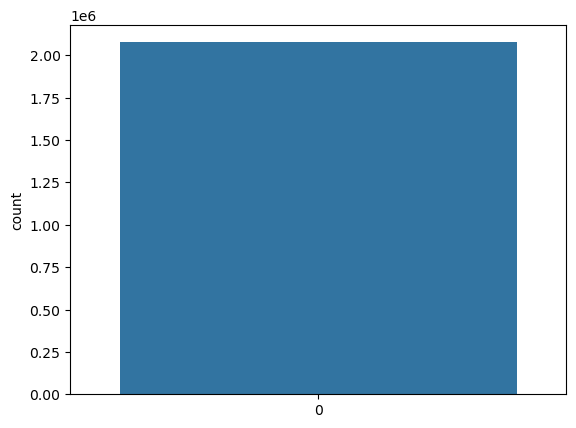

In [30]:
import seaborn as sns
sns.countplot(Y)

<Axes: xlabel='label', ylabel='count'>

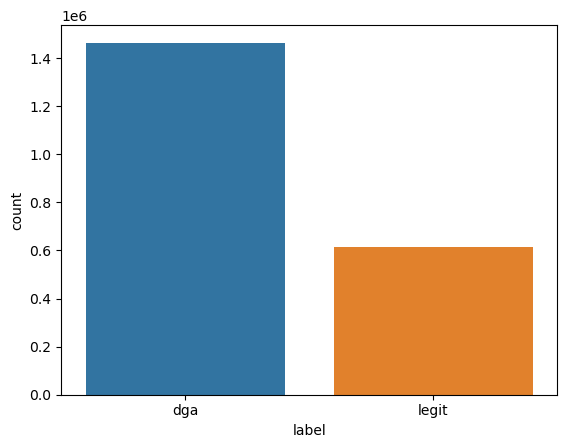

In [31]:
sns.countplot(Domain_data, x="label")

In [32]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.utils import pad_sequences

#max_words = num_words
max_len = 50

# Tokenizer
tok = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = pad_sequences(sequences,padding='post',maxlen=max_len)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, Y, test_size=0.20, random_state=200)

In [36]:
print(Counter(y_train))

Counter({0: 1170817, 1: 490493})


In [35]:
sns.countplot(y_train[0,1])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

## Balancing Data

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

In [ ]:
X_train.to_csv('/content/drive/My Drive/Colab Notebooks/BDL_X_train_sm.csv') 
y_train.to_csv('/content/drive/My Drive/Colab Notebooks/BDL_y_train_sm.csv')
X_test.to_csv('/content/drive/My Drive/Colab Notebooks/BDL_X_test_sm.csv')
y_test.to_csv('/content/drive/My Drive/Colab Notebooks/BDL_y_test_sm.csv')

## CNN

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 100
vocab_size=70
def create_my_model():
  textcnnmodel = Sequential()
  textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
  textcnnmodel.add(layers.Conv1D(32, 3, activation='relu'))
  textcnnmodel.add(layers.GlobalMaxPooling1D())
  textcnnmodel.add(layers.Flatten())
  
  textcnnmodel.add(layers.Dense(250, activation='relu'))
  textcnnmodel.add(layers.Dense(1, activation='sigmoid'))
  textcnnmodel.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
  return textcnnmodel 

In [ ]:
# define the grid search parameters
batchSize = [200, 500, 1000]
epochs = [20]
#dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
# create model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
model = KerasClassifier(build_fn=create_my_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameter_grid = dict(batch_size=batchSize, epochs=epochs)

In [ ]:
grid = HalvingGridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/20
2050/2050 [==============================] - 16s 6ms/step - loss: 0.1120 - accuracy: 0.9630
Epoch 2/20
2050/2050 [==============================] - 13s 6ms/step - loss: 0.0831 - accuracy: 0.9722
Epoch 3/20
2050/2050 [==============================] - 13s 6ms/step - loss: 0.0779 - accuracy: 0.9740
Epoch 4/20
2050/2050 [==============================] - 13s 6ms/step - loss: 0.0742 - accuracy: 0.9753
Epoch 5/20
2050/2050 [==============================] - 13s 6ms/step - loss: 0.0717 - accuracy: 0.9762
Epoch 6/20
2050/2050 [==============================] - 13s 6ms/step - loss: 0.0696 - accuracy: 0.9769
Epoch 7/20
2050/2050 [==============================] - 13s 7ms/step - loss: 0.0681 - accuracy: 0.9774
Epoch 8/20
2050/2050 [==============================] - 13s 6ms/step - loss: 0.0672 - accuracy: 0.9777
Epoch 9/20
2050/2050 [==============================] - 13s 6ms/step - loss: 0.0661 - accuracy: 0.9781
Epoch 10/20
2050/2050 [==============================] - 13s 6ms/step - l

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.980059 using {'batch_size': 1000, 'epochs': 30}
0.968781 (0.011925) with: {'batch_size': 200, 'epochs': 20}
0.968953 (0.008293) with: {'batch_size': 200, 'epochs': 30}
0.966212 (0.010241) with: {'batch_size': 200, 'epochs': 50}
0.971790 (0.002002) with: {'batch_size': 500, 'epochs': 20}
0.963963 (0.011173) with: {'batch_size': 500, 'epochs': 30}
0.963959 (0.011713) with: {'batch_size': 500, 'epochs': 50}
0.968083 (0.006344) with: {'batch_size': 1000, 'epochs': 20}
0.969594 (0.004338) with: {'batch_size': 1000, 'epochs': 30}
0.961824 (0.012262) with: {'batch_size': 1000, 'epochs': 50}
0.974471 (0.007306) with: {'batch_size': 200, 'epochs': 30}
0.976861 (0.002293) with: {'batch_size': 1000, 'epochs': 30}
0.974930 (0.006896) with: {'batch_size': 500, 'epochs': 20}
0.980059 (0.006868) with: {'batch_size': 1000, 'epochs': 30}


In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
cnnpred = grid.predict(X_test)
print(classification_report(y_test, cnnpred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    439016
           1       0.95      0.99      0.97    183976

    accuracy                           0.98    622992
   macro avg       0.97      0.99      0.98    622992
weighted avg       0.98      0.98      0.98    622992



In [ ]:
def create_my_model(optimizer='adam'):
  textcnnmodel = Sequential()
  textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
  textcnnmodel.add(layers.Conv1D(128, 5, activation='relu'))
  textcnnmodel.add(layers.GlobalMaxPooling1D())
  textcnnmodel.add(layers.Flatten())
  
  textcnnmodel.add(layers.Dense(250, activation='relu'))
  textcnnmodel.add(layers.Dense(1, activation='sigmoid'))
  textcnnmodel.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return textcnnmodel 

In [ ]:
# create model
model = KerasClassifier(build_fn=create_my_model, epochs=30, batch_size=1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [ ]:
# define the grid search parameters
optimizer = ['SGD','Adadelta', 'RMSprop', 'Adagrad','Adam']
parameter_grid = dict(optimizer=optimizer)

In [ ]:
grid = HalvingGridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid, X_test, y_test, display_labels=["legit", "dga"])

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BCNNmodel2.sav'
pickle.dump(grid, open(filename, 'wb'))

In [ ]:
import pickle

#load the model
grid_result = pickle.load(open('/content/drive/My Drive/Colab Notebooks/BCNNmodel.sav', 'rb'))

## CNN

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 200
vocab_size=70
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
textcnnmodel.add(layers.Conv1D(128, 5, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Flatten())
textcnnmodel.add(layers.Dense(250, activation='relu'))
textcnnmodel.add(layers.Dense(1, activation='sigmoid'))
textcnnmodel.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 200)           14000     
                                                                 
 conv1d (Conv1D)             (None, 46, 128)           128128    
                                                                 
 intermediate_layer (GlobalM  (None, 128)              0         
 axPooling1D)                                                    
                                                                 
 intermediate (Flatten)      (None, 128)               0         
                                                                 
 dense (Dense)               (None, 250)               32250     
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                      

In [ ]:
textcnnmodel.fit(X_train,y_train,
                     epochs=10,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=500)

Epoch 1/10
3518/3518 [==============================] - 100s 28ms/step - loss: 0.0638 - accuracy: 0.9784 - val_loss: 0.0461 - val_accuracy: 0.9851
Epoch 2/10
3518/3518 [==============================] - 89s 25ms/step - loss: 0.0422 - accuracy: 0.9861 - val_loss: 0.0416 - val_accuracy: 0.9863
Epoch 3/10
3518/3518 [==============================] - 99s 28ms/step - loss: 0.0379 - accuracy: 0.9875 - val_loss: 0.0406 - val_accuracy: 0.9865
Epoch 4/10
3518/3518 [==============================] - 89s 25ms/step - loss: 0.0351 - accuracy: 0.9884 - val_loss: 0.0384 - val_accuracy: 0.9874
Epoch 5/10
3518/3518 [==============================] - 89s 25ms/step - loss: 0.0334 - accuracy: 0.9889 - val_loss: 0.0368 - val_accuracy: 0.9877
Epoch 6/10
3518/3518 [==============================] - 99s 28ms/step - loss: 0.0319 - accuracy: 0.9893 - val_loss: 0.0363 - val_accuracy: 0.9880
Epoch 7/10
3518/3518 [==============================] - 99s 28ms/step - loss: 0.0307 - accuracy: 0.9897 - val_loss: 0.0364 

In [ ]:
loss, accuracy = textcnnmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

In [ ]:
feature_extractor = keras.Model(
   inputs=textcnnmodel.inputs,
   outputs=textcnnmodel.get_layer(name="intermediate").output,
)

In [ ]:
# Building the CNN Model
model = Sequential()      # initilaizing the Sequential nature for CNN model

# Adding the embedding layer which will take in maximum of 450 words as input and provide a 32 dimensional output of those words which belong in the top_words dictionary
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))


model.add(layers.Conv1D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling1D())
model.add(layers.Flatten(name="intermediate"))
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 200)           14000     
                                                                 
 conv1d_1 (Conv1D)           (None, 50, 32)            19232     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 32)           0         
 )                                                               
                                                                 
 intermediate (Flatten)      (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 250)               200250    
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                      

In [ ]:
# Fitting the data onto model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, verbose=2)

Epoch 1/20
13739/13739 - 76s - loss: 0.0506 - accuracy: 0.9832 - val_loss: 0.0364 - val_accuracy: 0.9883 - 76s/epoch - 6ms/step
Epoch 2/20
13739/13739 - 72s - loss: 0.0336 - accuracy: 0.9890 - val_loss: 0.0331 - val_accuracy: 0.9892 - 72s/epoch - 5ms/step
Epoch 3/20
13739/13739 - 65s - loss: 0.0296 - accuracy: 0.9903 - val_loss: 0.0305 - val_accuracy: 0.9901 - 65s/epoch - 5ms/step
Epoch 4/20
13739/13739 - 72s - loss: 0.0273 - accuracy: 0.9909 - val_loss: 0.0296 - val_accuracy: 0.9904 - 72s/epoch - 5ms/step
Epoch 5/20
13739/13739 - 64s - loss: 0.0255 - accuracy: 0.9914 - val_loss: 0.0301 - val_accuracy: 0.9901 - 64s/epoch - 5ms/step
Epoch 6/20
13739/13739 - 64s - loss: 0.0240 - accuracy: 0.9919 - val_loss: 0.0282 - val_accuracy: 0.9910 - 64s/epoch - 5ms/step
Epoch 7/20
13739/13739 - 73s - loss: 0.0228 - accuracy: 0.9923 - val_loss: 0.0287 - val_accuracy: 0.9907 - 73s/epoch - 5ms/step
Epoch 8/20
13739/13739 - 73s - loss: 0.0217 - accuracy: 0.9926 - val_loss: 0.0296 - val_accuracy: 0.9909

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.9954
Testing Accuracy:  0.9905


In [ ]:
model.pop() # this will remove the last layer
model.summary() # check the network 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 200)           14000     
                                                                 
 conv1d_1 (Conv1D)           (None, 50, 32)            19232     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 32)           0         
 )                                                               
                                                                 
 intermediate (Flatten)      (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 250)               200250    
                                                                 
Total params: 233,482
Trainable params: 233,482
Non-trainable params: 0
________________________________________________

In [ ]:
model.pop() # this will remove the last layer
model.summary() # check the network 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 200)           14000     
                                                                 
 conv1d_1 (Conv1D)           (None, 50, 32)            19232     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 32)           0         
 )                                                               
                                                                 
 intermediate (Flatten)      (None, 800)               0         
                                                                 
Total params: 33,232
Trainable params: 33,232
Non-trainable params: 0
_________________________________________________________________


In [ ]:
feature_mapping = model.predict(X_train) 

In [ ]:
feature_mapping.shape

In [ ]:
feature_mapping

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier().fit(feature_mapping, y_train)

In [ ]:
from sklearn.metrics import precision_score, accuracy_score,classification_report
print('accuracy on the train set: ', accuracy_score(RFmodel.predict(feature_mapping), y_train))

In [ ]:
RFpred = RFmodel.predict(model.predict(X_test))
print(classification_report(y_test, RFpred))

## Feature Extraction from Flatten Layer

In [ ]:
from tensorflow import keras
layer_name = 'intermediate'
intermediate_layer_model = keras.Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(X_train)

In [ ]:
intermediate_output

array([[1.3518333e-03, 1.5811089e+00, 1.8729873e+00, ..., 1.3680780e-01,
        1.3801426e-01, 1.8193164e+00],
       [6.2689817e-01, 2.7986262e+00, 8.1701422e-01, ..., 3.1541281e+00,
        9.0137744e-01, 3.6327264e+00],
       [0.0000000e+00, 1.5811089e+00, 1.8258429e+00, ..., 1.1521776e+00,
        2.7779346e+00, 1.1661419e+00],
       ...,
       [2.3673993e-01, 1.5811087e+00, 3.4376115e-01, ..., 1.5428569e+00,
        1.0857649e+00, 2.1839268e+00],
       [0.0000000e+00, 5.8344617e+00, 4.3522916e+00, ..., 1.7896113e+00,
        7.3660302e-01, 2.5254295e+00],
       [0.0000000e+00, 2.0971241e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.2456490e+00, 6.8616223e-01]], dtype=float32)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier().fit(intermediate_output, y_train)

In [ ]:
from sklearn.metrics import precision_score, accuracy_score,classification_report
print('accuracy on the train set: ', accuracy_score(RFmodel.predict(intermediate_output), y_train))

accuracy on the train set:  0.9999948820773762


In [ ]:
RFpred = RFmodel.predict(intermediate_layer_model.predict(X_test))
print(classification_report(y_test, RFpred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94    184080
           1       0.95      0.92      0.94    183740

    accuracy                           0.94    367820
   macro avg       0.94      0.94      0.94    367820
weighted avg       0.94      0.94      0.94    367820

